## Real Estate Market Analysis with Python

**Real estate is defined as the land and any permanent structures, like a home, or improvements attached to the land, whether natural or man-made [Investopedia](https://www.investopedia.com/terms/r/realestate.asp).**

**In this project, we'll use python to investigate Property transactions and Customer satisfaction of our client which is a Real estate company. By the end of this project, we'll provide meaningful insights about the property transactions and customer profiles. The insights will be as a result of cleaning, proprocessing, analyzing and visualizing the company's data.**

**The data provided by the company are `properties.csv` and `customers.csv`.**

**The following python libraries are the required for this project:**
- **Pandas**
- **Numpy**
- **Matplotlib**
- **Seaborn**
- **Pillow**

**This project consists of eight segments. They are:**
1. **Reading the data into Pandas Dataframe**
2. **Data Cleaning and Preprocessing**
3. **Combining the Two Datasets**
4. **Descriptive Statistics**
5. **Data Analysis**
6. **Data Visualization**
7. **Data Interpretation**
8. **References**

**We'll start by importing the aforementioned libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1. Reading the data into Pandas Dataframe

**We'll use the pandas library to load the data into pandas dataframe.**

**A pandas dataframe is a tabular structure that contains mulitiple observations for a given set of variables. It is two- dimensional. Therefore, to obtain a single data value from it, you have to provide two points of reference, there are the column of interst and the relevant row.**

In [2]:
data_properties = pd.read_csv('properties.csv', index_col=0)
properties_df = data_properties.copy()
properties_df.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [3]:
data_customer = pd.read_csv('customers.csv', index_col=0)
customers_df = data_customer.copy()
customers_df.head()

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


### 2. Data Cleaning and Preprocessing

**Data cleaning and proprocessing are two very important steps for the preparation of raw data for data analysis or modeling.**

**Data cleaning is the process of identifying and handling errors such as incomplete data, duplicate data and maintaining data consistency in order have an error free, clean and accurate data.**

**Data preprocessing is the process of transforming cleaned data for future modeling or analysis.**

**Both data cleaning and preprocessing are often used together.**

**In order to perform data cleaning and preprocessing effectively, therefore, for each column in the two dataframes, we'll follow these simple steps in no specific order;**
- **Datatype Inspection - check whether the column contain its appropraite the datatype.**
- **Null values - check if the column contains null values.**
- **Unique values Identification - Check the column unique values. This is extremely important.**
- **Removal of extra space or unwanted characters - with the unique values you can check if the column need this step.**
- **Mapping of categorical variable - you decide this if its important to you. `1` and `0` for mapping.**
- **Renaming of column - if you feel a name is inappropriate for a column, you can change.**

**We'll first start with `properties.csv` file.**

In [4]:
properties_df.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [5]:
# Descriptive summary for numeric columns.
# When we include `all` it returns numeric summary for all columns.

properties_df.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [6]:
# To check total number of missing values for all columns in the dataframe

properties_df.isna().sum()

﻿id            0
building       0
date_sale      0
type           0
property#      0
area           0
price          0
status         0
customerid    72
dtype: int64

In [7]:
# To check the datatypes for all columns in the dataframe

properties_df.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [8]:
# Returns all column names in the dataframe

properties_df.columns

Index(['﻿id', 'building', 'date_sale', 'type', 'property#', 'area', 'price',
       'status', 'customerid'],
      dtype='object')

In [9]:
properties_df.shape

(267, 9)

**We have 9 columns and 267 rows of data in the properties_df dataframe. Five of the columns have the datatype of `object`, they are date_sale, type, price, status, customerid. Three columns identify with the datatype `int64`, they are id, building and property#. Only area column have the `float64` datatype. Please note the following below:**
- **`object` - represents strings or letters**
- **`int64` - represents whole numbers without decimals**
- **`float64` - represents numbers with decimals place.**

**Looking at the columns in the dataframe, there is a need to transform some of them into they appropraite datatypes. In order to do that, let's first use pandas `to_numpy()` method on the `columns` attribute to make sure the columns name are the same with the one's above.**

In [10]:
properties_df.columns.to_numpy()

array(['\ufeffid', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

**Let's start with `id` column.**

**We noticed that the first column name `id` has changed to `\ufeffid`.**

In [11]:
properties_df['\ufeffid'].head()

0    1030
1    1029
2    2002
3    2031
4    1049
Name: ﻿id, dtype: int64

**To correct this error, we'll rename column `\ufeffid` to `id`.**

In [12]:
properties_df = properties_df.rename(columns={'\ufeffid': 'id'})
properties_df['id'].head()

0    1030
1    1029
2    2002
3    2031
4    1049
Name: id, dtype: int64

**Let's check if the changes were effected properly. This can be done by using pandas `columns` attribute and also chaining the attribute with pandas `to_numpy()` method.**

In [13]:
properties_df.columns

Index(['id', 'building', 'date_sale', 'type', 'property#', 'area', 'price',
       'status', 'customerid'],
      dtype='object')

In [14]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [15]:
properties_df['id'].dtype

dtype('int64')

**We'll hereby convert the `id` column from `int64` to `object` datatype. We can also check if the changes were effected.**

In [16]:
properties_df['id'] = properties_df['id'].astype(str)
properties_df['id'].dtype

dtype('O')

**Datatype `O` means `object` datatype.**

**Let's check the unique values.**

In [17]:
properties_df['id'].unique()

array(['1030', '1029', '2002', '2031', '1049', '3011', '3026', '3023',
       '1031', '4023', '1036', '1046', '4035', '2036', '2056', '1047',
       '5051', '2007', '3020', '3029', '3015', '2004', '2006', '5013',
       '1026', '2054', '3033', '1025', '3027', '3031', '2043', '3034',
       '3016', '1018', '2050', '2044', '3039', '3053', '2041', '5035',
       '4005', '1032', '3046', '1041', '1012', '5033', '4006', '5040',
       '4013', '1003', '2009', '4024', '4012', '1035', '2017', '4051',
       '3014', '2051', '2025', '3047', '2046', '5016', '4041', '4018',
       '2005', '2010', '2022', '2047', '2012', '3038', '4030', '3017',
       '1045', '2040', '2042', '2048', '3049', '1017', '1039', '2049',
       '3054', '3055', '3042', '1038', '2020', '2014', '3001', '3043',
       '2016', '4049', '4022', '3059', '4034', '5027', '5028', '2026',
       '3022', '2024', '3003', '2011', '2028', '3028', '3036', '4010',
       '4011', '3035', '3037', '2032', '2018', '2035', '5025', '2029',
      

**From the above, we can see that the column is now transformed from `int64` to `object` datatype. For the purpose of efficiency, let's strip the column of any extra space.**

In [18]:
properties_df['id'] = properties_df['id'].str.strip()

In [19]:
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


**For the remaining columns of our dataset, we'll repeat the above steps performed on the first column.**

#### The building column.

In [20]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [21]:
properties_df['building'].dtype

dtype('int64')

**We should convert the building column datatype from `int64` to `object`.**

In [22]:
properties_df['building'] = properties_df['building'].astype(str)
properties_df['building'].dtype

dtype('O')

**The unique values in the building column are below:**

In [23]:
properties_df['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [24]:
properties_df['building'].isna().sum()

0

**We have five unique values and no missing value or empty row in the building type.**

In [25]:
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


#### The date_sale column

In [26]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [27]:
properties_df['date_sale'].dtype

dtype('O')

**We'll use pandas `unique()` method to see the unique values in the column.**

In [28]:
properties_df['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

**We can see the unique `dates` in the dataset. One important thing we noticed is `#NUM` values, we need to replace it with pandas default null values.**
**We'll then strip any extra space in the column, this will be done for efficiency.**
**We'll also transform the date_sale from `object` datatype to `datetime` datatype.**

In [29]:
properties_df['date_sale'] = np.where(properties_df['date_sale'] == '#NUM!', 
                                      pd.NA, 
                                      properties_df['date_sale'])

properties_df['date_sale'] = properties_df['date_sale'].str.strip()

properties_df['date_sale'] = pd.to_datetime(properties_df['date_sale'])
properties_df['date_sale'].unique()

<DatetimeArray>
['2005-11-01 00:00:00', '2005-10-01 00:00:00', '2007-07-01 00:00:00',
 '2007-12-01 00:00:00', '2004-11-01 00:00:00', '2007-09-01 00:00:00',
 '2008-01-01 00:00:00', '2006-06-01 00:00:00', '2006-03-01 00:00:00',
 '2004-10-01 00:00:00', '2006-08-01 00:00:00', '2007-10-01 00:00:00',
 '2006-11-01 00:00:00', '2007-04-01 00:00:00', '2006-10-01 00:00:00',
 '2006-12-01 00:00:00', '2005-03-01 00:00:00', '2007-03-01 00:00:00',
 '2006-09-01 00:00:00', '2007-01-01 00:00:00', '2007-05-01 00:00:00',
 '2006-07-01 00:00:00', '2008-05-01 00:00:00', '2007-11-01 00:00:00',
 '2005-01-01 00:00:00', '2007-08-01 00:00:00', '2005-06-01 00:00:00',
 '2007-02-01 00:00:00', '2007-06-01 00:00:00', '2005-02-01 00:00:00',
 '2004-08-01 00:00:00', '2008-12-01 00:00:00', '2010-05-01 00:00:00',
 '2006-04-01 00:00:00', '2005-08-01 00:00:00', '2004-06-01 00:00:00',
 '2005-12-01 00:00:00', '2004-03-01 00:00:00', '2006-02-01 00:00:00',
 '2005-04-01 00:00:00', '2006-05-01 00:00:00',                 'NaT',
 '20

In [30]:
properties_df['date_sale'].dtype

dtype('<M8[ns]')

**We successfully transformed the data_sale column from `object` to `datetime64` datatype.**

In [31]:
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,Apartment,49,1375.45,"$467,083.31",Sold,C0014


#### The type column.

In [32]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [33]:
properties_df['type'].dtype

dtype('O')

In [34]:
properties_df['type'].unique()

array(['Apartment', 'Office'], dtype=object)

**We'll convert the values in the type column to lowercase letters.**

In [35]:
properties_df['type'] = properties_df['type'].str.lower()

properties_df['type'].unique()

array(['apartment', 'office'], dtype=object)

In [36]:
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


#### The property# column.

In [37]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [38]:
properties_df['property#'].dtype

dtype('int64')

**We'll convert the datatype of the property# column from `int64` to `object` datatype.**

In [39]:
properties_df['property#'] = properties_df['property#'].astype(str)
properties_df['property#'].dtype

dtype('O')

**The property# column is now of the `object` datatype.**

**Let's focus on the unique values of the column.**

In [40]:
properties_df['property#'].unique()

array(['30', '29', '2', '31', '49', '11', '26', '23', '36', '46', '35',
       '56', '47', '51', '7', '20', '15', '4', '6', '13', '54', '33',
       '25', '27', '43', '34', '16', '18', '50', '44', '39', '53', '41',
       '5', '32', '12', '40', '3', '9', '24', '17', '14', '10', '22',
       '38', '45', '42', '48', '55', '1', '59', '28', '37', '57', '19',
       '21', '8', '52', '58'], dtype=object)

**Let's strip any extra space that might be in the property# column.**

In [41]:
properties_df['property#'] = properties_df['property#'].str.strip()
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


#### The area column.

In [42]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [43]:
properties_df['area'].dtype

dtype('float64')

**The datatype of the area column is `float64` which is alright for the column.**

In [44]:
properties_df['area'].unique()

array([ 743.09,  756.21,  587.28, 1604.75, 1375.45,  675.19,  670.89,
        720.81,  782.25,  794.52, 1160.36, 1942.5 , 1109.25, 1400.95,
       1479.72,  790.54,  723.93,  781.07, 1127.76,  720.7 ,  649.69,
       1307.45,  618.38,  625.8 , 1203.29, 1434.09, 1596.35, 1110.32,
        697.89,  957.53,  722.96,  923.21,  670.24,  785.48,  798.28,
       1121.95,  733.19,  717.05,  747.5 ,  827.87, 1608.84, 1132.06,
       1383.84,  927.83,  669.16,  928.16,  798.5 , 1305.62,  927.08,
        649.8 ,  743.41, 1283.45, 1288.62, 1222.34,  579.75, 1128.4 ,
        701.66, 1336.93, 1171.55, 1137.44,  618.16, 1057.92, 1396.86,
        736.63,  723.83, 1238.58,  977.87, 1093.  ,  680.57, 1615.29,
        720.38, 1769.48,  410.71, 1200.82,  800.96,  775.69,  713.71,
        763.21, 1603.99,  784.19, 1273.88,  966.57, 1357.16, 1343.39,
        758.69,  789.25, 1611.85, 1111.72, 1058.25,  791.72, 1068.58,
       1325.31, 1273.55,  606.33,  598.58, 1013.27, 1074.71])

**The area column unique values shows there are no issues with the column.**

In [45]:
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


#### The price column.

In [46]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'status', 'customerid'], dtype=object)

In [47]:
properties_df['price'].dtype

dtype('O')

**The price column is of the datatype `object`. We need to transform it into the appropriate datatype which is of the `float` datatype. In order to that, we'll create a new column called `price$` for distinction with `float` datatype**.

In [48]:
properties_df['price$'] = properties_df['price'].str.strip('$')
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [49]:
properties_df['price$'].dtype

dtype('O')

**The new column price$ is of the `object` datatype which is not want we wanted. To convert it into the `float` datatype we'll do the following below:**

In [50]:
properties_df['price$'] = properties_df['price$'].replace(',','', regex=True)
properties_df['price$'] = properties_df['price$'].astype(float)
properties_df['price$'].dtype

dtype('float64')

**Now the datatype of price$ column is now `float64`.**

In [51]:
properties_df['price$'].unique()

array([246172.68, 246331.9 , 209280.91, 452667.01, 467083.31, 203491.85,
       212520.83, 198591.85, 265467.68, 235633.26, 317473.86, 503790.23,
       217786.38, 460001.26, 448134.27, 249591.99, 196142.19, 258572.48,
       310831.21, 207281.59, 168834.04, 396973.83, 188743.11, 179674.08,
       306363.64, 200300.63, 382041.13, 245572.79, 407214.29, 355073.4 ,
       256821.64, 226342.8 , 191389.87, 297008.97, 250773.15, 312211.14,
       190119.5 , 225050.52, 261742.74, 344530.89, 215410.28, 252185.99,
       480545.81, 300385.62, 240539.35, 222138.72, 228410.05, 197053.51,
       193660.62, 237060.15, 372001.7 , 290031.26, 238811.06, 199054.2 ,
       496266.41, 346906.89, 376964.62, 315733.15, 188273.73, 253831.02,
       278575.87, 402081.8 , 310832.59, 257183.48, 326885.34, 344568.74,
       214631.68, 237207.68, 464549.19, 310577.04, 205098.21, 248525.12,
       224463.87, 220606.28, 220865.  , 338181.18, 432679.91, 196220.05,
       323915.81, 200719.02, 380809.52, 213942.56, 

In [52]:
properties_df['price$'].nunique()

266

In [53]:
properties_df['price$'].isna().sum()

0

**We have 266 unique values with no null values. From the unique values, we can see they are no errors.**

In [54]:
properties_df.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


**We'll now drop the `price` column. This will enable us to have a less crowded dataset.**

In [55]:
properties_df = properties_df.drop(columns='price')
properties_df.head()

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,Sold,C0014,467083.31


#### The status column.

In [56]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area',
       'status', 'customerid', 'price$'], dtype=object)

In [57]:
properties_df['status'].dtype

dtype('O')

**The datatype of the status column is of the `object` datatype which is ok. We'll have a look at the unique values.**

In [58]:
properties_df['status'].unique()

array([' Sold ', '-'], dtype=object)

**The status column contains extra space before the names, therefore, we'll remove it from the column. Since, the status variable type of data is categorical with unique values of `Sold` and `-`. We'll map the values for `Sold` and `-` to `1` and `0` respectively.**

In [59]:
properties_df['status'] = properties_df['status'].str.strip()
properties_df['status'] = properties_df['status'].map({'Sold': 1, '-': 0})
properties_df['status'].unique()

array([1, 0], dtype=int64)

**From the unique values above, there are only two unique values. Let's rename the status column and we'll give a very much descriptive name `sold`.**

In [60]:
properties_df = properties_df.rename(columns={'status': 'sold'})

**We can confirm the changes by doing the folowing:**

In [61]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area', 'sold',
       'customerid', 'price$'], dtype=object)

#### The customerid column.

In [62]:
properties_df.columns.to_numpy()

array(['id', 'building', 'date_sale', 'type', 'property#', 'area', 'sold',
       'customerid', 'price$'], dtype=object)

In [63]:
properties_df['customerid'].dtype

dtype('O')

**We have the customerid column datatype as `object` which is fine and we'll work with it.**

**Let's check for the unique values for the customerid.**

In [64]:
properties_df['customerid'].unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

**From the unique values, we can see that the values contains extra space at the begining at the end of each unique value. We'll strip it in order to have a clean dataset.**

In [65]:
properties_df['customerid'] = properties_df['customerid'].str.strip()
properties_df['customerid'].unique()

array(['C0028', 'C0027', 'C0112', 'C0160', 'C0014', 'C0125', 'C0166',
       'C0034', 'C0170', 'C0009', 'C0041', 'C0057', 'C0061', 'C0089',
       'C0159', 'C0171', 'C0042', 'C0093', 'C0051', 'C0064', 'C0128',
       'C0019', 'C0037', 'C0127', 'C0018', 'C0040', 'C0080', 'C0083',
       'C0085', 'C0091', 'C0007', 'C0048', 'C0065', 'C0096', 'C0164',
       'C0038', 'C0087', 'C0142', 'C0015', 'C0122', 'C0017', 'C0020',
       'C0086', 'C0150', 'C0156', 'C0169', 'C0022', 'C0072', 'C0136',
       'C0149', 'C0011', 'C0073', 'C0110', 'C0111', 'C0123', 'C0070',
       'C0075', 'C0076', 'C0105', 'C0135', 'C0153', 'C0047', 'C0060',
       'C0066', 'C0068', 'C0090', 'C0095', 'C0151', 'C0162', 'C0010',
       'C0054', 'C0056', 'C0081', 'C0084', 'C0016', 'C0035', 'C0062',
       'C0099', 'C0114', 'C0006', 'C0053', 'C0069', 'C0077', 'C0168',
       'C0058', 'C0107', 'C0131', 'C0144', 'C0098', 'C0130', 'C0141',
       'C0067', 'C0082', 'C0113', 'C0132', 'C0137', 'C0155', 'C0163',
       'C0039', 'C00

**Now the customerid column is without an extra space. It also contain null values in the column.**

In [66]:
properties_df['customerid'].isna().sum()

72

**The customerid column has `72` null values.**

**Finally, we'll give the column an appropriate name.**

In [67]:
properties_df = properties_df.rename(columns={'customerid': 'customer_id'})
properties_df.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [68]:
properties_df.describe(include='all')

,id,building,date_sale,type,property#,area,sold,customer_id,price$
count,267,267,195,267,267,267.000000,267.000000,195,267.000000
unique,240,5,NaN,2,59,NaN,NaN,162,NaN
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN
freq,2,63,NaN,259,7,NaN,NaN,9,NaN
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000


In [69]:
properties_df.dtypes

id                     object
building               object
date_sale      datetime64[ns]
type                   object
property#              object
area                  float64
sold                    int64
customer_id            object
price$                float64
dtype: object

**The `properties_df` dataframe is now cleaned and can be use for analysis or modeling.**

**Next, we'll clean and preprocess the `customers.csv` file.**

In [70]:
# Returns the first five rows

customers_df.head()

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [71]:
# Descriptive summary for numeric columns.
# When we include `all` it returns numeric summary for all columns.

customers_df.describe(include='all')

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [72]:
# Returns the columns datatype of the dataframe

customers_df.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [73]:
# Returns the total number of empty/null values of each column of the dataframe

customers_df.isna().sum()

﻿customerid          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [74]:
customers_df.shape

(162, 12)

**The customer_df dataframe have 162 row and 12 columns. Eleven out of the twelve columns are of the `object` datatype, only the deal_satisfaction column is of another datatype called `int64`.**

**We'll start by identifying the column names.**

In [75]:
# Returns the column names of dataframe

customers_df.columns

Index(['﻿customerid', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')

In [76]:
# Returns an array of column names of the dataframe
# Vetifies if the names from the '.columns' attribute are correct
# We'll be using this attribute and method chaining often

customers_df.columns.to_numpy()

array(['\ufeffcustomerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction',
       'mortgage', 'source'], dtype=object)

**We'll begin with the first column.**

**Using attribute and method chaining, we can see the first column name is `\ufeffcustomerid` and not `customerid`. Thefore, let's rename the `\ufeffcustomerid` column to `customer_id`.****

In [77]:
customers_df = customers_df.rename(columns={'\ufeffcustomerid': 'customer_id'})
customers_df.columns.to_numpy()

array(['customer_id', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'], dtype=object)

**As we can see the change is made. Now we'll look at the datatype of the column.**

In [78]:
customers_df['customer_id'].dtype

dtype('O')

**The datatype is `object` and it fine.**

**We'll identify its unique values.**

In [79]:
customers_df['customer_id'].unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

**As we can see the unique values are many and its hard to tell if any variable contain extra space. Therefore, to be sure there are no extra spaces, we'll perform an action to remove any extra space.**

**We'll also check if it contains null values.**

In [80]:
customers_df['customer_id'] = customers_df['customer_id'].str.strip()

In [81]:
customers_df['customer_id'].isna().sum()

0

**It contains no null values.**

In [82]:
customers_df.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


#### The entity column.

In [83]:
customers_df.columns.to_numpy()

array(['customer_id', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'], dtype=object)

**Let's find its unique values below.**

In [84]:
customers_df['entity'].unique()

array(['Individual', 'Company'], dtype=object)

**From the cell above, we can see that the column has only two unique values and its of the datatype `object` which is what we want. It also have no null values. The entity variable type of data is categorical, therefore, we'll map the unique values `Individual` and `Company` to `1` and `0` respectively.**

**Finally, we'll rename the column to a more descriptive name which is individual.**

In [85]:
customers_df['entity'] = customers_df['entity'].map({'Individual': 1, 'Company': 0})
customers_df = customers_df.rename(columns={'entity': 'individual'})
customers_df['individual'].unique()

array([1, 0], dtype=int64)

In [86]:
customers_df.head()

,customer_id,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,1,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,1,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,1,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


#### The name and surname columns.

In [87]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction',
       'mortgage', 'source'], dtype=object)

**Let's check the datatype and null values of both name and surname columns.**

In [88]:
print(customers_df['name'].dtype)
print(customers_df['name'].isna().sum())

object
0


**The name column have no null value and is of the datatype `object` which is fine by us.**

**We do the same for the surname column.**

In [89]:
print(customers_df['surname'].dtype)
print(customers_df['surname'].isna().sum())

object
0


**The datatype of surname column is `object` and it also have no null value.**

**We'll combine the name and surname columns into one column called `full_name`. This new column will contain the contents of name and surname column. This will help us find the name and surname of a customer easily.**

**We'll then drop the name and surname columns to make our dataset less crowded.**

In [90]:
customers_df['full_name'] = customers_df['name'] + ' ' + customers_df['surname']
customers_df = customers_df.drop(columns=['name', 'surname'])
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,F,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,1,11/26/1962,M,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,1,4/7/1959,M,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,1,11/25/1959,M,USA,California,Home,5,No,Website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,Investment,5,No,Website,Marleez Co


#### The birth_date column.

In [91]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

**Lets find its unique values.**

In [92]:
customers_df['birth_date'].unique()

array(['5/11/1968', '11/26/1962', '4/7/1959', '11/25/1959', nan,
       '3/6/1957', '5/24/1947', '10/17/1969', '10/5/1975', '6/17/1966',
       '6/17/1956', '8/10/1962', '8/19/1941', '9/3/1939', '1/8/1977',
       '2/7/1967', '9/9/1957', '10/17/1967', '6/9/1938', '9/14/1966',
       '12/6/1958', '11/5/1963', '1/20/1937', '9/23/1962', '9/8/1968',
       '4/15/1958', '2/26/1976', '6/19/1952', '12/25/1977', '8/11/1966',
       '8/14/1968', '10/30/1969', '5/12/1965', '9/1/1973', '1/20/1962',
       '12/25/1974', '6/13/1967', '3/22/1975', '4/13/1967', '8/12/1975',
       '4/4/1965', '2/13/1931', '10/12/1968', '9/24/1964', '7/31/1970',
       '3/20/1957', '8/20/1971', '3/5/1940', '3/3/1941', '2/3/1967',
       '1/7/1954', '6/7/1973', '12/7/1964', '6/8/1933', '6/16/1960',
       '5/7/1972', '5/12/1967', '3/27/1974', '7/23/1942', '2/10/1974',
       '3/26/1972', '6/10/1977', '2/26/1966', '4/1/1970', '4/27/1947',
       '12/27/1985', '2/3/1953', '1/11/1965', '1/1/1959', '5/5/1970',
       '3/13

**We have many values for the unique values as it contains birth dates of each customer. We'll also strip it of any extra space. Furthermore, the datatype is `object` which is not ideal for a column that contains dates, therefore we'll convert it to a `datetime` datatype.**

In [93]:
customers_df['birth_date'] = customers_df['birth_date'].str.strip()
customers_df['birth_date'] = pd.to_datetime(customers_df['birth_date'])
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,F,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,1,1962-11-26,M,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,1,1959-04-07,M,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,1,1959-11-25,M,USA,California,Home,5,No,Website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,Investment,5,No,Website,Marleez Co


#### The sex column.

In [94]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

**The above contain a well suitable name sex and does not require any chanege.**

**We'll check for the unique values of the column.**

In [95]:
customers_df['sex'].unique()

array(['F', 'M', nan], dtype=object)

**It uniqe values are `F`, `M` and `nan` which represnets Female, Male and null values respectively. The column consists of categorical data, therefore, we'll map `F` to 1, `M` to 0 and null value to pandas default null.**

**The column's datatype is `object`.**

In [96]:
customers_df['sex'] = customers_df['sex'].map({'F': 1, 'M': 0, '': pd.NA})
customers_df['sex'].unique()

array([1, 0, nan], dtype=object)

In [97]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,Home,5,No,Website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,Investment,5,No,Website,Marleez Co


#### The country column.

In [98]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

**Name of the column is okay, we'll now check the unique values of the column.**

In [99]:
customers_df['country'].unique()

array(['USA', 'USA ', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia',
       'UK', 'Denmark'], dtype=object)

**From the unique values, we have duplicates in the result output which is `USA`. This is because one of them contains extra space after the letters. To resolve this issue, we'll strip the column of any extra space.**

**Lastly, the datatype of the column is `object`.**

In [100]:
customers_df['country'] = customers_df['country'].str.strip()
customers_df['country'].unique()

array(['USA', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia', 'UK',
       'Denmark'], dtype=object)

**Now we have no duplicate country in the country column.**

In [101]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,Home,5,No,Website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,Investment,5,No,Website,Marleez Co


#### The state column.

In [102]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

**The name is okay. We'll now look for the unique values.**

In [103]:
customers_df['state'].unique()

array(['California', nan, 'Oregon', 'Arizona', 'Nevada', 'Colorado',
       'Utah', 'Virginia', 'Wyoming', 'Kansas'], dtype=object)

**The column is of the datatype `object` and it also contain null values.**

**We can see that all the non null unique values here are states only in the United States of America. This is concerning because we have other countries in the dataset. This might be as a result of wrong entry or delibrate effort or the customers from other countries left the state column blank. We'll investigate further.**

**We'll start by finding the subset of the data where customers not from `USA` enters one of the states in the `USA` as they state.**

In [104]:
# we create a list with the sates in USA
usa_states = ['California', 'Oregon', 'Arizona', 'Nevada', 'Colorado','Utah', 'Virginia', 'Wyoming', 'Kansas']

# Filter out countries other than USA where they state is a USA state
country_wrong_states = (customers_df['country'] != 'USA') & (customers_df['state'].isin(usa_states))

customers_df[country_wrong_states]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
21,C0162,1,1966-09-14,0,Germany,California,Investment,5,No,Agency,Araceli Nelson
63,C0091,1,1974-02-10,0,UK,Arizona,Investment,4,No,Agency,Gordon Brown
78,C0118,1,1954-02-27,0,Belgium,Arizona,Investment,4,No,Website,Dangelo Shea
116,C0114,1,1964-10-06,0,UK,California,Investment,4,No,Agency,Jakobe Bailey


**There are four customers whom does not identify with USA as they country but have included states in USA as they states. To solve these issue, let's convert the states of these customers to panda null values.**

In [105]:
customers_df.loc[country_wrong_states, 'state'] = pd.NA

**We can confirm the changes below:**

In [106]:
customers_df[country_wrong_states]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
21,C0162,1,1966-09-14,0,Germany,<NA>,Investment,5,No,Agency,Araceli Nelson
63,C0091,1,1974-02-10,0,UK,<NA>,Investment,4,No,Agency,Gordon Brown
78,C0118,1,1954-02-27,0,Belgium,<NA>,Investment,4,No,Website,Dangelo Shea
116,C0114,1,1964-10-06,0,UK,<NA>,Investment,4,No,Agency,Jakobe Bailey


In [107]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,Home,5,No,Website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,Investment,5,No,Website,Marleez Co


#### The purpose column.

In [108]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

In [109]:
customers_df['purpose'].unique()

array(['Home', 'Investment'], dtype=object)

**We have two unique values `Home` and `Investment`. The column is of the datatype `object`. Let have the values of the column in lowercase letters.**

In [110]:
customers_df['purpose'] = customers_df['purpose'].str.lower()
customers_df['purpose'].unique()

array(['home', 'investment'], dtype=object)

In [111]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,Yes,Website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,No,Website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,Yes,Agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,No,Website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,No,Website,Marleez Co


#### The deal_satisfaction column.

In [112]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

In [113]:
customers_df['deal_satisfaction'].unique()

array([4, 1, 5, 3, 2], dtype=int64)

**The deal_satisfaction column is of the datatype `int64`. It also has five unique values ranging from 1 to 5. It tells us how a customer is satisfied with the deal.**

#### The Mortgage column.

In [114]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

In [115]:
customers_df['mortgage'].unique()

array(['Yes', 'No'], dtype=object)

**`Yes` and `No` are the two unique values in our column. The colunm is of the `object` datatype. The mortgage column is categorical in nature, therefore, we'll map the `Yes` to 1 and `No` to 0.**

In [116]:
customers_df['mortgage'] = customers_df['mortgage'].map({'Yes': 1, 'No': 0})
customers_df['mortgage'].unique()

array([1, 0], dtype=int64)

In [117]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,Website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,Website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,Agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,Website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,Website,Marleez Co


#### The source column.

In [118]:
customers_df.columns.to_numpy()

array(['customer_id', 'individual', 'birth_date', 'sex', 'country',
       'state', 'purpose', 'deal_satisfaction', 'mortgage', 'source',
       'full_name'], dtype=object)

In [119]:
customers_df['source'].unique()

array(['Website', 'Agency', 'Client'], dtype=object)

**The source column have only three unique values which are `Website`, `Agency` and `Client`. The datatype is `object`. We need to convert the values to lowercase letters.**

In [120]:
customers_df['source'] = customers_df['source'].str.lower()
customers_df['source'].unique()

array(['website', 'agency', 'client'], dtype=object)

In [121]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [122]:
customers_df.isna().sum()

customer_id           0
individual            0
birth_date            7
sex                   7
country               0
state                12
purpose               0
deal_satisfaction     0
mortgage              0
source                0
full_name             0
dtype: int64

**The customers_df dataframe or dataset is cleaned and preprocessed, therefore, it can use for future analysis and modeling.**

### 3. Combining the Two Datasets
**Both the properties_df and customers_df are preprocessed and cleaned. We need to combine the two datasets in order for us to have a comprehensive single dataset comprising of properties and customers datasets.**

**To combine these datasets, we'll make use of the pandas `merge` method. Using a common column of both datasets called `customer_id` on which we'll join the datasets. We'll also carry out a left join in order for the new dataset to contain all rows of properties_df dataframe and it matching rows of customers_df dataframe. Therefore, where there's no match, the new the dataframe will also contain `NA` for the corresponing columns of customers_df dataframe.**

**The new merged dataframe will be called `real_estate_df`.**

In [123]:
properties_df.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [124]:
customers_df.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [125]:
real_estate_df = pd.merge(properties_df, customers_df, on='customer_id', how='left')
real_estate_df.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [126]:
real_estate_df.shape

(267, 19)

**The real_estate_df dataframe contains 267 rows and 19 columns.**


### 4. Descriptive Statistics
**We need to carry out a comprehensive statistical analysis on the real_estate_df to understand the distribution of the important variables.**

- **What are each variable's main characteristics specifically the numerical ones?**
- **What are the sales and overall performance by building type?**
- **What are the sales and overall performance by country and state?**

#### i. Breakdown by Building

**First, we'll take a look at the building variable and its different types. We'll examine the totals and averages breakdown by building. Let's follow the steps below;**
- **Start by examining how many building types there are in the data set.**
- **Select columns of interest which to examine the totals by building type. Make a list with those variables, including building as the index variable. They are sold and mortgage.**
- **Find the total number of sold properties, and how many of them had mortgages per building type.**
- **Select columns of interest to examine the averages by building type and consider these columns. They are area, price, and deal satisfaction.**
- **Determine the average values of area , price , and deal satisfaction per building type.**

In [127]:
real_estate_df.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [128]:
real_estate_df.describe(include='all')

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178.0,195,177,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2.0,8,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0.0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108.0,177,118,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


In [129]:
real_estate_df.isna().sum()

id                    0
building              0
date_sale            72
type                  0
property#             0
area                  0
sold                  0
customer_id          72
price$                0
individual           72
birth_date           89
sex                  89
country              72
state                90
purpose              72
deal_satisfaction    72
mortgage             72
source               72
full_name            72
dtype: int64

**Breakdown by Building**

**Let's find its unique values.**

In [130]:
real_estate_df['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

**We have five unique building in our dataset.**

**Next, we'll find the total by building type.**

In [131]:
columns_of_interest = ['building', 'sold', 'mortgage']
building_total = real_estate_df[columns_of_interest].groupby('building').sum()
building_total

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


**From the table above, building 1 have a total sale of 46 with a mortage total of 14. Building 2 have a total sale of 54 and with a mortgage of 18 etc.**

**We'll find the average by building using these numerical variables area, price and deal satisfaction.**

In [132]:
columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']
building_average = real_estate_df[columns_of_interest].groupby('building').mean().round(2)
building_average

,area,price$,deal_satisfaction
building,,,
1,928.04,275143.24,3.63
2,943.89,286661.85,3.52
3,927.85,280451.26,3.57
4,974.72,290239.52,3.87
5,914.30,274557.60,3.53


**The average area, price and deal satisfaction for building 1 are 928.04, 275134.24 and 3.63 respectively. For building 2 the average area, price and deal satisfaction are 943.89, 286661.85 and 3.52 respectively. Building 3 average area, price and deal satisfaction are 927.85, 280451.26 and 3.57 respectively. Average area, price and deal satisfaction for building 4 are 974.72, 290239.52 and 3.87 respectively. 914.30, 274557.60 and 3.53 are the average area, price and deal satisfaction for building 5.**


#### ii. Breakdown by Country
**We'll perform the same analysis as we did building types by choosing columns of interest and using summary statistics for the totals and averages. Make note that the breakdown of calculations by country will give you the frequency distribution by country.**

**We'll start with the totals by country for properties sold and their mortgage.**

In [133]:
columns_of_interest = ['country', 'sold', 'mortgage']
country_total = real_estate_df[columns_of_interest].groupby('country').sum()
country_total

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


**The average by country for area, price and deal satisfaction.**

In [134]:
columns_of_interest = ['country', 'area', 'price$', 'deal_satisfaction']
country_average = real_estate_df[columns_of_interest].groupby('country').mean().round(2)
country_average

,area,price$,deal_satisfaction
country,,,
Belgium,852.73,229075.47,3.00
Canada,917.38,274069.38,5.00
Denmark,785.48,257183.48,1.00
Germany,743.41,205098.21,5.00
Mexico,1283.45,338181.18,3.00
Russia,903.76,278828.84,2.50
UK,739.48,220142.68,4.00
USA,900.79,270096.27,3.58


#### iii. Breakdown by State

**We'll determine the frequency distribution by state, like we did for the countries table. In addition, create a table containing the relative frequency and the cumulative frequency by state.**

**We can also calculate the cumulative frequency using the .cumsum() pandas method.**

In [135]:
columns_of_interest = ['state', 'sold', 'mortgage']
state_total = real_estate_df[columns_of_interest].groupby('state').sum()
state_total

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


**Let's confirm the if state total for sold is the same as USA's country total for sold. If so, we cleaned and prepared our data correctly.**

In [136]:
state_total['sold'].sum()

177

In [137]:
country_total.loc['USA', 'sold']

177

**Let's focus on the relative and cumulative frequency of sales, we'll create a new table from the state_total table which will have only the sold column. It'll be called state_sold. We'll sort it in descending order so that the state with the highest sale will be first.**

In [138]:
state_sold = state_total[['sold']].sort_values('sold', ascending=False)
state_sold

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


**Since we want to create relative and cumulative frequencies of sale, it'll be more appropraite to rename the sold column to frequency.**

In [139]:
state_sold = state_sold.rename(columns={'sold': 'frequency'})
state_sold

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


**To create the relative column, we'll divide each frequency by the total frequency. We'll then apply a pandas method called `cumsum` to the relative frequency to create the cumulative frequency.**

In [140]:
state_sold['relative_frequency'] = state_sold['frequency']/state_sold['frequency'].sum()
state_sold

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [141]:
state_sold['cumulative_frequency'] = state_sold['relative_frequency'].cumsum()
state_sold

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


### 5. Data Analysis

**This is a very vital stage where we'll perform more in-dept analysis of the data to discover trends, correlations and insights. We'lll start by analzing the customers' age, age intervals and also perform similar analysis for the proprieties' prices. Most importantly, we'll find out more about the relationship between age and price.**

#### i. Analyzing Customers' Age

**To analyze customers age, We'll do the following;**
- **Calculate the age of the customer at the time of purchase.**
- **Create age interval categories. After calculating the customers' ages, we'll then create age intervals to evaluate group behavior. Separate the age into 10 intervals of equal length.**
- **Break down by age intervals. Finally, we'll use summary statistics to determine how many properties have been sold by age intervals.**

In [142]:
# We'll create a new dataframe data which be a copy of the real estate dataframe
# we do this because we want to keep the original data intact

data = real_estate_df.copy()
data.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


**Looking at our data, we do not have the age of the customer at the time of purchase, so therefore, we'll have to create it. We'll do that by substracting the birth_date variable from the date_sale variable.**

In [143]:
data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']

0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [144]:
data['age_at_purchase'][0].days

7073

In [145]:
# It's important to note that the 'age_at_purchase' field we've just created is of timedelta datatype.
# A timedelta object represents a duration, the difference between two dates or times.
# For our analysis, we need the age in integers or floats for better manipulation.
# To convert it, we use the 'days' attribute to extract the number of days, as timedelta measures duration in days.

data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x: x.days)
data['age_at_purchase']

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [146]:
# To obtain the age in years at the time of purchase, we can divide the 'age_at_purchase' field by 365.
# This may not be perfectly accurate due to leap years, but it should be close enough for our analysis.

data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [147]:
# Since age is typically represented in whole numbers, we can round down the values using np.floor().

data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x: np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

**We have created the age_at_purchased of customers.**

**Next, we'll create the age interval**

In [148]:
# Note that we retain the original values when calculating statistics, as they are more precise.
# To divide age into different intervals, we can use the 'cut' method from pandas.
# This function segments and sorts the data values into bins we specify.
# Here, we're dividing the 'age_at_purchase' into 10 bins and setting the decimal precision to 0.

data['age_interval'] = pd.cut(data['age_at_purchase'], bins=10, precision=0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

**The age interval has been created successfully.** 

**Next we'll find the breakdown by age interval to see how many properties have been purchased by each different age interval.**

In [149]:
data.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,country,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,USA,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,USA,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,USA,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,USA,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,USA,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]"


In [150]:
columns_of_interest = ['age_interval', 'sold']
sold_age_interval = data[columns_of_interest].groupby('age_interval').sum()
sold_age_interval

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


**The above the table contains the age interval and its corresponding number of sold properties.**

#### ii. Analyzing Properties Price
**We'll follow similar steps above.**

In [151]:
data['price_interval'] = pd.cut(data['price$'], bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

**The total number of properties.**

In [152]:
# Number of properties for each price interval
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = data[columns_of_interest].groupby('price_interval').count()

# Here, 'sold' simply represents a count, so it's more fitting to rename the column as 'count'.
all_properties_by_price = all_properties_by_price.rename(columns={'sold': 'count'})
all_properties_by_price

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


**The total number of sold properties.**

In [153]:
# Total number of properties sold for each price interval
columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = data[columns_of_interest].groupby('price_interval').sum()
sold_properties_by_price

,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


**Total number of properties not sold.**

In [154]:
## Total number of properties for each price interval not sold

all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


**The above table contains total number of properties, number properties not sold and the number of properties sold grouped by its respective price interval.**

#### iii. Relationship between Price and Age

**To end the data analysis segment, we must examine the relationship between the age of the customers' and the prices of the properties. We'll therefore find the covariance and correlation by the age and the price variables.**

In [155]:
data.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [156]:
# Filter data of only sold properties
sold_data = data[data['sold'] == 1]

# Also filter the data for only properties bought by an individual and not company
sold_data = sold_data[sold_data['individual'] == 1]

sold_data.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [157]:
sold_data[['age_at_purchase', 'price$']]

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


**We'll therefore calculate the covariance of age and price. Covariance doesn't provide an understandable value, however, it's useful in statistical analysis.**

In [158]:
np.cov(sold_data['age_at_purchase'], sold_data['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

**Correlation is more interpretable measure, therefore the correlation between age and price is as follows:**

In [159]:
np.corrcoef(sold_data['age_at_purchase'], sold_data['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [160]:
# For comprehensive results, let's drop any rows with missing values and store this in a new variable 'sold_data_no_na'.

sold_data_no_na = sold_data.dropna()

sold_data_no_na[['age_at_purchase', 'price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.195746
price$,-0.195746,1.000000


In [161]:
sold_data_no_na[['age_at_purchase', 'price$']].cov()

,age_at_purchase,price$
age_at_purchase,170.134509,-2.023462e+05
price$,-202346.242186,6.280745e+09


### 6. Data Visualization

**This part of the project we'll visualize the data. The data analysis and descriptive statistics will also serve great here. We'll use different visualizations to answer critical and important questions regarding our data.**

**The questions include the following:**
- **What is the average deal satisfaction for each country? How does it look by state?**
- **What is the yearly revenue of the company?**
- **How many apartments are sold in each state?**
- **What is the age distribution for customers?**
- **What are the yearly sales for each building?**

#### i. The Average Deal Satisfaction per Country
**To answer this question, we'll need have a breakdown of deal satisfaction by country. Fortunately, we have already calculated it during the descriptive statistics segment. Therefore, we'll use it for this segment as well.**

**Note: We'll be reusing some already created variables if need be.**

**The visualization will be a bar chart with the following parameters;**
    
    - white background with a grid
    - size of the figure (12,6)
    - fitting color which is not the default one
    - x ticks, with a font size of 13 and a bold fontweight
    - y ticks, with a font size of 13 and a bold fontweight
    - y label for the deal satisfaction (no need for an x label)
    - remove the top and the right border of the chart
    
**We will maintain these visualization parameters for all subsequent charts in order to ensure consistency and comparability across the different visualizations.**

In [162]:
country_average

,area,price$,deal_satisfaction
country,,,
Belgium,852.73,229075.47,3.00
Canada,917.38,274069.38,5.00
Denmark,785.48,257183.48,1.00
Germany,743.41,205098.21,5.00
Mexico,1283.45,338181.18,3.00
Russia,903.76,278828.84,2.50
UK,739.48,220142.68,4.00
USA,900.79,270096.27,3.58


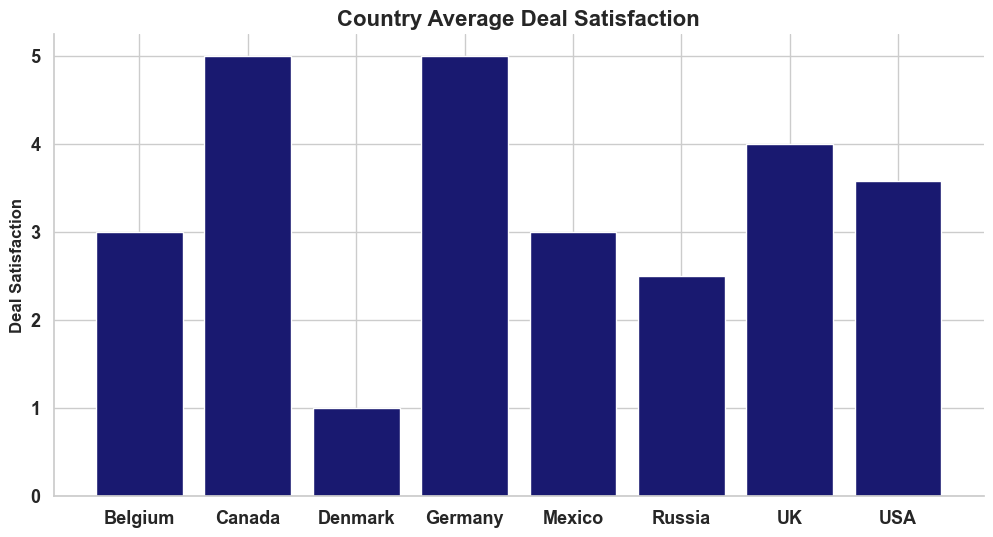

In [163]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.bar(x = country_average.index, 
        height = country_average['deal_satisfaction'],
       color='midnightblue')
plt.xticks(fontweight='bold', fontsize=13)
plt.ylabel('Deal Satisfaction', fontweight='bold')
plt.yticks(fontweight='bold', fontsize=13)
plt.title('Country Average Deal Satisfaction', fontsize=16, fontweight='bold')
sns.despine()
plt.show()

**Canada and Germany have the highest average deal satisfaction with 5 each while Denmark is a the country with the least deal satisfaction with 1.**

#### Deal Satisfaction by State

In [164]:
columns_of_interest = ['state', 'deal_satisfaction']
state_avg_deal = data[columns_of_interest].groupby('state').mean().round(2)
state_avg_deal

,deal_satisfaction
state,
Arizona,3.22
California,3.74
Colorado,3.18
Kansas,3.00
Nevada,3.24
Oregon,3.09
Utah,3.20
Virginia,4.50
Wyoming,3.00


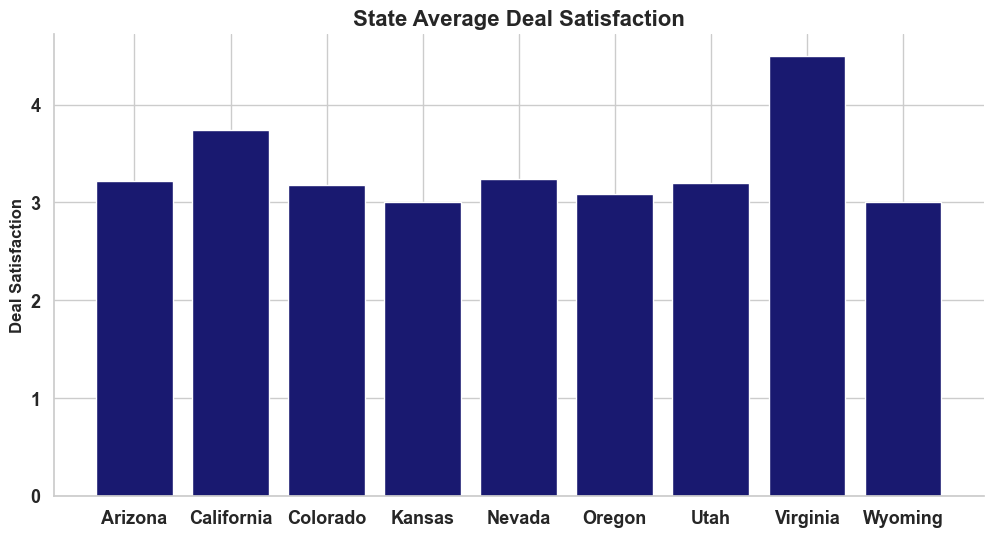

In [165]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.bar(x = state_avg_deal.index, 
        height = state_avg_deal['deal_satisfaction'], 
        color='midnightblue')
plt.xticks(fontweight='bold', fontsize=13)
plt.ylabel('Deal Satisfaction', fontweight='bold')
plt.yticks(fontweight='bold', fontsize=13)
plt.title('State Average Deal Satisfaction', fontsize=16, fontweight='bold')
sns.despine()
plt.show()

#### ii. Revenue Graph
**We'll plot a line chart showing the company's yearly revenue.**

In [166]:
# filter for the data where date_sale is not null

sold_properties = data[data['date_sale'].isna() == False]
sold_properties.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [167]:
# In order to plot a line graph showing the yearly revenue of the company, we need a year of sale column
# We don't have it, therefore, we'll create it using the date_sale column

sold_properties['year_of_sale'] = sold_properties['date_sale'].apply(lambda x: x.year)
sold_properties.head()

C:\Users\MOSES_Atachin\AppData\Local\Temp\ipykernel_4536\3852887829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_properties['year_of_sale'] = sold_properties['date_sale'].apply(lambda x: x.year)


,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_of_sale
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004


In [168]:
columns_of_interest = ['year_of_sale', 'price$']
revenue_per_year = sold_properties[columns_of_interest].groupby('year_of_sale').sum()
revenue_per_year = revenue_per_year.rename(columns={'price$': 'revenue$'})
revenue_per_year

,revenue$
year_of_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


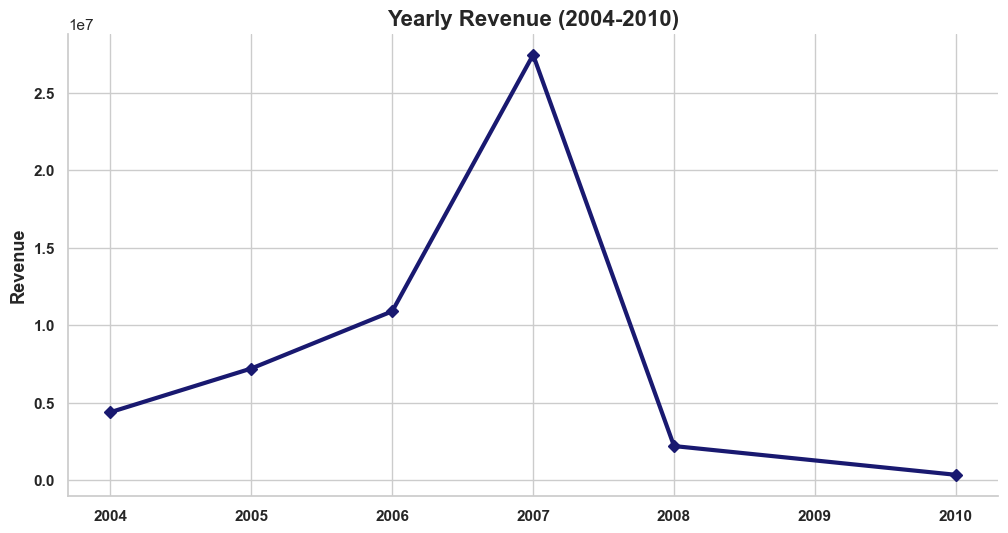

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.plot(revenue_per_year.index, 
         revenue_per_year['revenue$'], 
         linewidth=3, 
         marker='D',
         color='midnightblue')
plt.title('Yearly Revenue (2004-2010)', fontsize=16, weight='bold')
plt.ylabel('Revenue', weight='bold', fontsize=13)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
sns.despine()
plt.show()

**There are issues in the chart above, the revenue figures are displayed in scientific notation, which is not readily interpretable and the year 2009 lacks its own tick mark, due to its absence from the revenue_per_year dataframe.**

**Currently, revenue is represented in dollars, but the figures are large and overwhelming. For a cleaner, more comprehensible visualization, we should present revenue in thousands or millions. To simplify this, we'll create a new Series named 'revenue$inM'.**

In [170]:
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$']/1000000
revenue_per_year

,revenue$,revenue$inM
year_of_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [171]:
# We'll add a new data point for the year 2009 to improve data presentation
# It will display 0 revenue, reflecting the actual situation.

revenue_per_year_adj = revenue_per_year.copy()
row = {'revenue$': 0, 'revenue$inM': 0}
revenue_per_year_adj.loc[2009] = row
revenue_per_year_adj

,revenue$,revenue$inM
year_of_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538
2009,0.00,0.000000


In [172]:
# Let's rearrange the year of sale index

revenue_per_year_adj.index = ['2004', '2005', '2006', '2007', '2008', '2010', '2009']
revenue_per_year_adj = revenue_per_year_adj.loc[['2004', '2005', '2006', '2007', '2008', '2009', '2010']]
revenue_per_year_adj

,revenue$,revenue$inM
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


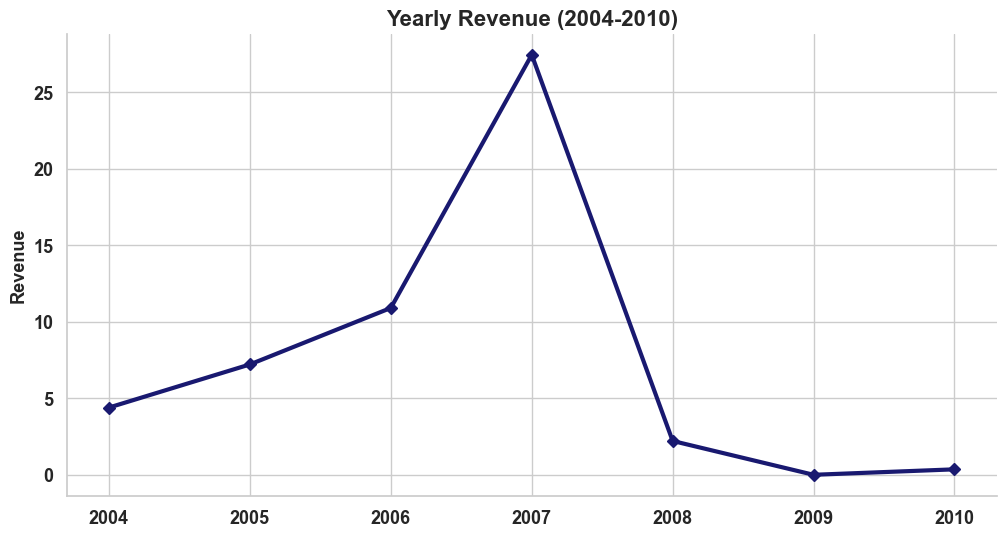

In [173]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.plot(revenue_per_year_adj.index, 
         revenue_per_year_adj['revenue$inM'], 
         linewidth=3, 
         marker='D',
         color='midnightblue')
plt.title('Yearly Revenue (2004-2010)', fontsize=16, weight='bold')
plt.ylabel('Revenue', weight='bold', fontsize=13)
plt.yticks(weight='bold', fontsize=13)
plt.xticks(weight='bold', fontsize=13)
sns.despine()
plt.show()

**From our graph above, the year 2007 was the year with the most revenue for our conmpany.**

#### iii. Apartments Sold by State

**We'll pareto chart, in which the bar shows the absolute frequency of buildings sold by state, and the line chart will display the cumulative frequency. We already created a variable that contains all the information we need, it is called state sold.**

In [174]:
state_sold

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


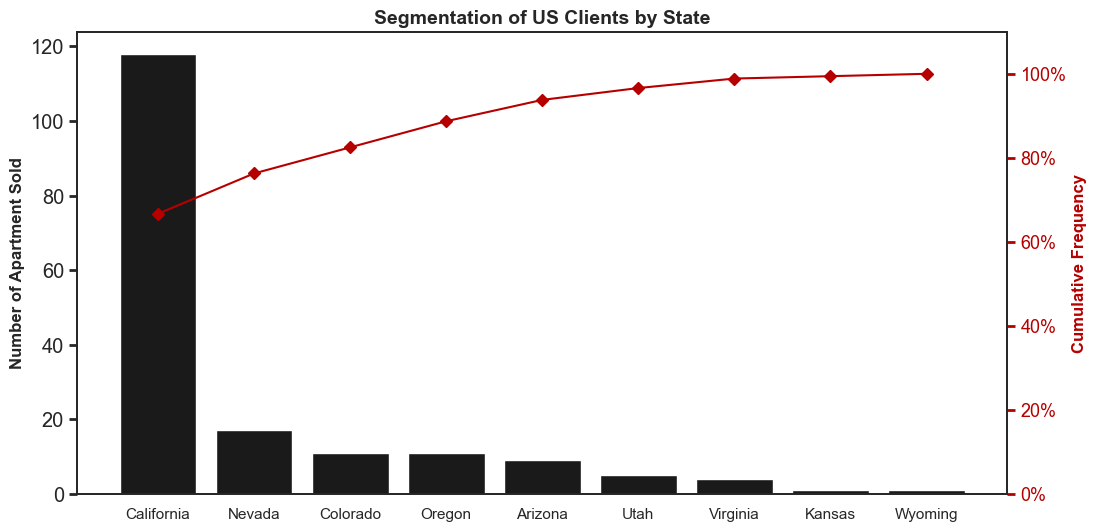

In [175]:
from matplotlib.ticker import PercentFormatter

sns.set_style('white')
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(state_sold.index, 
       state_sold['frequency'], 
       color='k')
ax.set_ylabel('Number of Apartment Sold', 
              weight='bold')
ax.tick_params(axis='y', 
               width=2,
               labelsize='large')
ax1 = ax.twinx()
ax1.set_ylim(0,1.1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax1.plot(state_sold.index, 
         state_sold['cumulative_frequency'], 
         color='#b60000', marker='D')
ax1.set_ylabel("Cumulative Frequency", 
               color = "#b60000", 
               weight = "bold")
ax1.tick_params(axis = "y", 
                colors = "#b60000", 
                width = 2, 
                labelsize = 13)
ax.set_title("Segmentation of US Clients by State", fontsize = "14", weight = "bold")

plt.show()

#### iv. Age Distribution Histogram
**The histogram will the age distribution of customers**

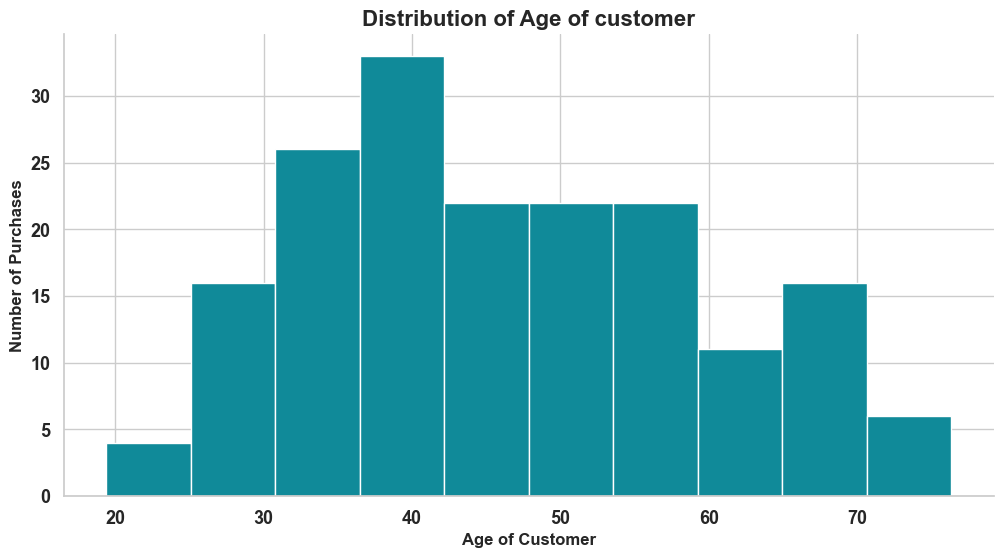

In [176]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.hist(data['age_at_purchase'], 
         bins=10, 
         color='#108A99')
plt.title('Distribution of Age of customer', 
          weight='bold', 
          fontsize=16)
plt.xlabel('Age of Customer', fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.ylabel('Number of Purchases', fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
sns.despine()
plt.show()

#### v. Sales per Year by Building Type

**We'll create a stacked bar graph showing the yearly sales for each building type.**

In [177]:
# We'll use sold properties dataframe because it contains only sold propertes to crate a new dataframe
data_stacked_area = sold_properties.copy()

In [178]:
# Our goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
# We need to split this into separate entities, resulting in five dummy variables.

building_dummies = pd.get_dummies(data_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [179]:
# Now, let's incorporate these dummy variables into our main dataframe.

data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_of_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [180]:
# We'll rename new columns to appropriate names

data_stacked_area = data_stacked_area.rename(columns={'1': 'building_1', 
                                                      '2': 'building_2', 
                                                      '3': 'building_3', 
                                                      '4': 'building_4', 
                                                      '5': 'building_5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customer_id,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_of_sale,building_1,building_2,building_3,building_4,building_5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [181]:
# We'll make the breakdown by year and by bulding

columns_of_interest = ['year_of_sale', 'building_1', 'building_2', 'building_3', 'building_4', 'building_5']

stack_area = data_stacked_area[columns_of_interest].groupby('year_of_sale').sum()
stack_area

,building_1,building_2,building_3,building_4,building_5
year_of_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


**The table does not contain the year 2009, this will make the data visualization less representative. Let's us include the 2009 year to our table.**

In [182]:
stack_area_adj = stack_area.copy()

row = {'building_1': 0, 'building_2': 0, 'building_3': 0, 'building_4': 0, 'building_5': 0}
stack_area_adj.loc['2009'] = row

stack_area_adj.index = ['2004', '2005', '2006', '2007', '2008', '2010', '2009']
stack_area_adj = stack_area_adj.loc[['2004', '2005', '2006', '2007', '2008', '2009', '2010']]
stack_area_adj

,building_1,building_2,building_3,building_4,building_5
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2009,0,0,0,0,0
2010,0,0,0,0,1


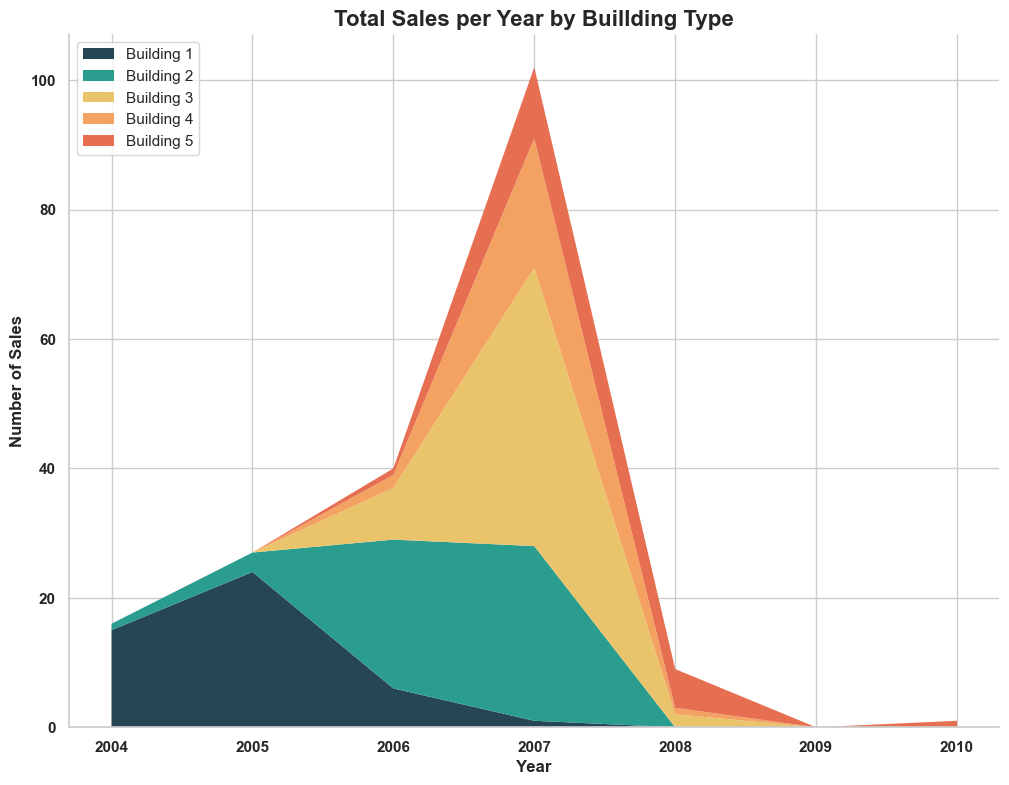

In [183]:
colors = ["#264653", "#2A9D8F", "#E9C46A",'#F4A261','#E76F51']
labels = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']


sns.set_style('whitegrid')
plt.figure(figsize=(12, 9))
plt.stackplot(stack_area_adj.index, 
              stack_area_adj['building_1'], 
              stack_area_adj['building_2'], 
              stack_area_adj['building_3'], 
              stack_area_adj['building_4'], 
              stack_area_adj['building_5'], 
              colors= colors,
              edgecolor='none')

plt.legend(labels=labels, loc='upper left')
plt.title('Total Sales per Year by Buillding Type', weight='bold', fontsize=16)
plt.xlabel('Year', weight='bold')
plt.xticks(weight='bold')
plt.ylabel('Number of Sales', weight='bold')
plt.yticks(weight='bold')
sns.despine()

plt.savefig('total_sales_per_year_building_type.png')

plt.show()

### 7. Data Interpretation

**Based on the data cleaning, preprocessing, analyzing and visualizing we have conducted for this project, here are some inferences we'll like to make to our cleint. They are:**

##### i. Customer Profile

**Customer profiles enables real estate companies to look for potential kinds of buyers. Quite often there is a challenge, this is due to the higher demand of housing than the affordability. This makes it difficult to identify a potential customer profile.**

**From our analysis, we have identfy the different age groups of our customers.**

In [184]:
sold_age_interval

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


**From the table above, we can see the age groups and how many properties they bought. We have two groups that purchased the most properties, they are: 31-36 and 36-42 with a 26 and 33 properties respectively.**

**We can state that people within the age interval of 31-42 bought properties the most from the company. People in that age interval are often stable finacially and can buy a home. The company's marketing team can focus more on these set of people through target ads on socail media.**

**As the data we use is a sample data with a few hundred of customer records, to come to a more conclusive positon, we need more data.**


##### ii. Sales by Country

**The countries we are operational in are important to the real estate company. We have also already identify the countries from our geographical anaysis.**

In [185]:
country_total

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


**90% of our sales where made in United States of America. The real estate company can invest even higher to increase they sales in the USA. For the other countries, a cumulative sales of 10% where made.**

##### iii. Total Number of Sales per Year by Building


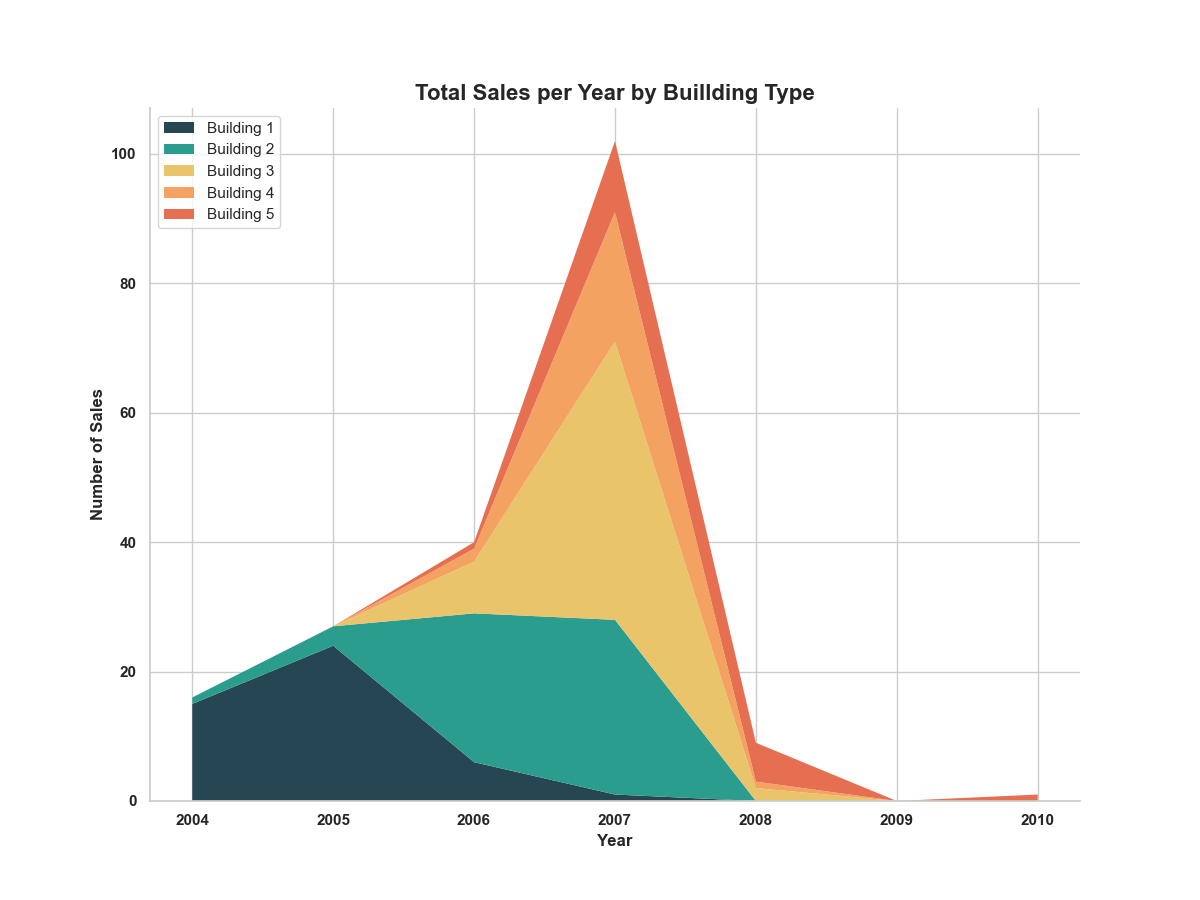

In [191]:
from PIL import Image

img = Image.open('total_sales_per_year_building_type.png')
img

**The graph above shows that the year 2007 was the year the company made the most sales. Based on historic events, the most successful year for sales happened right before the market crash in the States. There are no sales for the year 2009 and we had to explicitly include the year in the stacked area chart.**

**With recent data, we can perform similar anlysis to obtain current trends.**

##### iv. Building Characteristics

**From our analysis, we have identify building and how many times they were sold.**

In [192]:
building_total

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


**Buildings type of 2 and 3 are the most sold buildings with the total of 54 and 53 respectively. Let's examine the average area, price and deal satisfaction for each of the buildings.**

In [193]:
building_average

,area,price$,deal_satisfaction
building,,,
1,928.04,275143.24,3.63
2,943.89,286661.85,3.52
3,927.85,280451.26,3.57
4,974.72,290239.52,3.87
5,914.30,274557.60,3.53


**From the above table, buildings of type 4 have the highest average area, price and deal satisfaction. Closely followed by buildings of type 2 and 3. The average area of building 4 is 974,72, the average price is 29023.52 USD and they have an average deal satisfaction of 3.87. We can state they are large, luxurious and expensive buildings.**

**The data shows that the customers are likely to buy smaller and less expensive building. The real estate company can use this information for strategic decisions for the future. They can either developed standard buildings such as 2 and 3 in order to sell more buildings at an average price or develop spacious and luxurious buidings and sell them at much higher price.**


### 8. References

**Check out the following resources to learn more the tools used in this project:**

- **Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html**
- **Numpy user guide: https://numpy.org/doc/stable/user/**
- **Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html**
- **Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html**
- **PIL(Pilow) tutorial: https://pillow.readthedocs.io/en/stable/handbook/tutorial.html**
